In [2]:
import pandas as pd
import numpy as np
import datetime
import os
import pickle 
from matplotlib import pyplot as plt

In [3]:
os.chdir(r"C:\Users\aman.khatri91425\Desktop\HomeCredit\Bigdata\Common Maps KNN")

In [25]:
df = pd.read_pickle(os.getcwd()+r"\Data Files\Combined Score_new.pkl")
df1 = pd.read_pickle(os.getcwd()+r"\Data Files\Combined Score_exi.pkl")

In [26]:
df1.shape

(979788, 33)

In [27]:
df=pd.concat([df,df1])

In [28]:
TIME_DECISION_DATE = "TIME_DECISION_DATE"
FINAL_SCORE = "COMBINED_SCORE_KNN"
RISK_SCORE = "RISK_SCORE_SCALED"
COMBINED_SCORE = "COMBINED_SCORE"
TARGET = "RISK_FSTQPD30"
PREDICTOR_LIST = ['G_NO_PAYMENT_CURRENT_PAYMENT_1','C_G_RISK_FPD10_SCORE','C_G_RISK_FPD10_MM_SCORE',
                  'G_NO_PAYMENT_CURRENT_PAYMENT_2','G_DEFAULT_FLAG_CHANGE_1','C_G_RISK_FSTQPD30_SCORE','C_G_RISK_FPD30_SCORE']
df["MONTH"] = df[TIME_DECISION_DATE].dt.strftime("%y-%m")

In [29]:
df.head()

,SKP_CREDIT_CASE,TIME_DECISION_DATE,CUS_LAT,CUS_LONG,GRID_ID,RISK_FSTQPD30,RISK_SCORE,NO_PAYMENT_CURRENT_PAYMENT_1,C_RISK_FPD10_SCORE,C_RISK_FPD10_MM_SCORE,...,LOGIT_G_NO_PAYMENT_CURRENT_PAYMENT_2,LOGIT_G_DEFAULT_FLAG_CHANGE_1,LOGIT_C_G_RISK_FSTQPD30_SCORE,LOGIT_C_G_RISK_FPD30_SCORE,COMBINED_SCORE_KNN,LOGIT_RISK_SCORE,LOGIT_COMBINED_SCORE_KNN,COMBINED_SCORE,RISK_SCORE_SCALED,MONTH
178520,227116996,2019-03-01,28.345585,77.317181,500_01862_04603,0.0,0.115587,0.484330,0.564576,0.547718,...,0.072566,-0.079454,0.068993,0.393225,0.088980,-2.034896,-2.326150,0.076524,0.071334,19-03
178521,227116998,2019-03-01,22.747523,75.844927,500_01542_03394,0.0,0.233381,0.492877,0.487085,0.493776,...,-0.139342,-0.272258,-0.094360,-0.124729,0.078491,-1.189317,-2.463034,0.110846,0.117965,19-03
178522,226628918,2019-03-01,22.744679,75.878234,500_01549_03393,0.0,0.241544,0.592593,0.557196,0.526971,...,0.367814,-0.047068,0.096303,0.093205,0.096826,-1.144236,-2.232995,0.134266,0.121077,19-03
178523,226896354,2019-03-01,8.875746,76.590472,500_01619_00343,0.0,0.294996,0.498575,0.667897,0.506224,...,-0.131242,-0.044563,0.321900,-0.033539,0.096983,-0.871242,-2.231203,0.155276,0.141457,19-03
178524,226900787,2019-03-01,23.092791,77.516796,500_01881_03461,0.0,0.092799,0.512821,0.339483,0.344398,...,0.304223,-0.215361,-0.355991,-0.640460,0.066053,-2.279932,-2.648963,0.051703,0.061395,19-03


# GINI

### Gini Chart

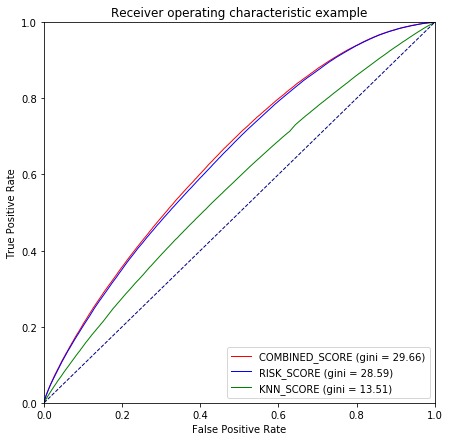

In [30]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

fig = plt.figure(figsize = (7,7))
ax1 = fig.add_subplot(1, 1, 1)

lw = 1
fpr, tpr, thresholds = roc_curve(df[TARGET],df[COMBINED_SCORE])
roc_auc = auc(fpr, tpr)
ax1.plot(fpr, tpr, color='red', lw=lw, label='COMBINED_SCORE (gini = %0.2f)' % ((2*roc_auc-1)*100))

fpr, tpr, thresholds = roc_curve(df[TARGET],df[RISK_SCORE])
roc_auc = auc(fpr, tpr)
ax1.plot(fpr, tpr, color='blue', lw=lw, label='RISK_SCORE (gini = %0.2f)' % ((2*roc_auc-1)*100))

fpr, tpr, thresholds = roc_curve(df[TARGET],df[FINAL_SCORE])
roc_auc = auc(fpr, tpr)
ax1.plot(fpr, tpr, color='green', lw=lw, label='KNN_SCORE (gini = %0.2f)' % ((2*roc_auc-1)*100))

ax1.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### MOM GINI

In [31]:
gini_dic = {}
for x in df["MONTH"].unique():
    if "MONTH" not in gini_dic:
        gini_dic["MONTH"] = []
    if FINAL_SCORE not in gini_dic: 
        gini_dic[FINAL_SCORE] = []
    if RISK_SCORE not in gini_dic: 
        gini_dic[RISK_SCORE] = []
    if COMBINED_SCORE not in gini_dic: 
        gini_dic[COMBINED_SCORE] = []
    gini_dic["MONTH"].append(x)
    gini_dic[FINAL_SCORE].append((2*roc_auc_score(df[df["MONTH"]==x]["RISK_FSTQPD30"],df[df["MONTH"]==x][FINAL_SCORE])-1)*100)
    gini_dic[RISK_SCORE].append((2*roc_auc_score(df[df["MONTH"]==x]["RISK_FSTQPD30"],df[df["MONTH"]==x][RISK_SCORE])-1)*100)
    gini_dic[COMBINED_SCORE].append((2*roc_auc_score(df[df["MONTH"]==x]["RISK_FSTQPD30"],df[df["MONTH"]==x][COMBINED_SCORE])-1)*100)
    for y in PREDICTOR_LIST:
        if y not in gini_dic:
              gini_dic[y] = []
        gini_dic[y].append(((2*roc_auc_score(df[df["MONTH"]==x]["RISK_FSTQPD30"],df[df["MONTH"]==x][y])-1)*100))
    
gini_df = pd.DataFrame(gini_dic)
gini_df

,MONTH,COMBINED_SCORE_KNN,RISK_SCORE_SCALED,COMBINED_SCORE,G_NO_PAYMENT_CURRENT_PAYMENT_1,C_G_RISK_FPD10_SCORE,C_G_RISK_FPD10_MM_SCORE,G_NO_PAYMENT_CURRENT_PAYMENT_2,G_DEFAULT_FLAG_CHANGE_1,C_G_RISK_FSTQPD30_SCORE,C_G_RISK_FPD30_SCORE
0,19-03,16.845902,29.525865,31.041111,7.362147,9.228358,7.217447,7.815672,2.273477,11.077285,6.737639
1,19-04,16.308428,31.554040,32.967168,8.270979,8.414928,6.242621,7.328455,3.250623,11.282969,6.052346
2,19-05,13.132598,29.951563,30.997798,5.586678,7.664352,6.610970,5.868423,3.884831,9.779801,5.811360
3,19-06,12.822969,27.777070,28.729996,6.489852,7.289230,5.375350,5.968727,2.029307,9.322961,5.320141
4,19-07,10.568178,26.167599,26.935792,5.767214,6.209098,4.262997,5.842958,1.331410,8.528748,4.942448
5,19-08,12.023002,27.594687,28.456842,6.352293,7.614485,5.766557,6.138418,1.524555,9.112176,5.408865


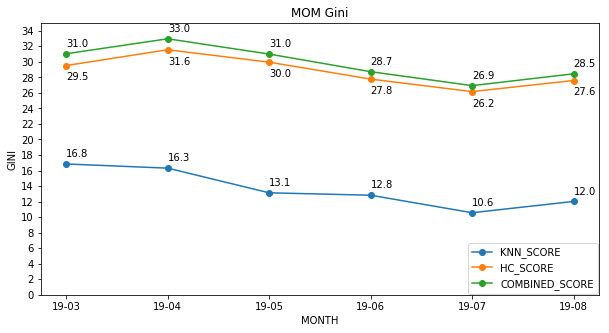

In [32]:
fig = plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(gini_df["MONTH"],gini_df["COMBINED_SCORE_KNN"], marker='o', scaley = False, label = "KNN_SCORE")
ax1.plot(gini_df["MONTH"],gini_df[RISK_SCORE], marker='o', scaley = False, label = "HC_SCORE")
ax1.plot(gini_df["MONTH"],gini_df["COMBINED_SCORE"], marker='o', scaley = False, label= "COMBINED_SCORE")

for i, txt in enumerate(gini_df["COMBINED_SCORE_KNN"]):
    plt.annotate("{:.1f}".format(txt), (gini_df["MONTH"][i], gini_df["COMBINED_SCORE_KNN"][i]+0.9))
for i, txt in enumerate(gini_df[RISK_SCORE]):
    plt.annotate("{:.1f}".format(txt), (gini_df["MONTH"][i], gini_df[RISK_SCORE][i]-1.9))
for i, txt in enumerate(gini_df["COMBINED_SCORE"]):
    plt.annotate("{:.1f}".format(txt), (gini_df["MONTH"][i], gini_df["COMBINED_SCORE"][i]+0.9))

plt.legend(loc='lower right', borderaxespad=0.1)
plt.ylim(0,35)
plt.ylabel("GINI")
plt.xlabel("MONTH")
plt.yticks(np.arange(0,35,2))
ax1.set_title("MOM Gini")
plt.show()

### MOM GINI of Predictors

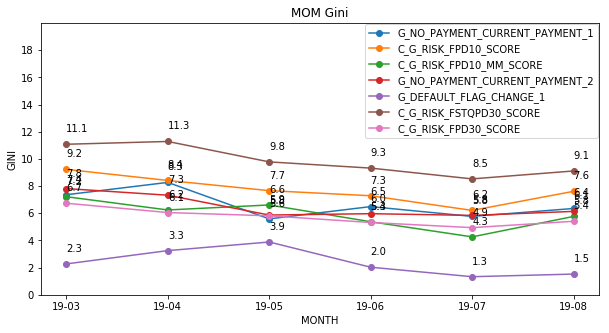

In [33]:
fig = plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(1, 1, 1)

for x in PREDICTOR_LIST:
    ax1.plot(gini_df["MONTH"],gini_df[x], marker='o', scaley = False, label = x)
    for i, txt in enumerate(gini_df[x]):
        plt.annotate("{:.1f}".format(txt), (gini_df["MONTH"][i], gini_df[x][i]+0.9))

plt.legend(loc='upper right', borderaxespad=0.1)
plt.ylim(0,20)
plt.ylabel("GINI")
plt.xlabel("MONTH")
plt.yticks(np.arange(0,20,2))
ax1.set_title("MOM Gini")
plt.show()

# Lifts and Gains Chart

In [34]:
def lift_and_gain_df(data=None,target=None, prob=None):
    data['target0'] = 1 - data[target]
    data['bucket'] = pd.qcut(data[prob], 10)
    grouped = data.groupby('bucket', as_index = False)
    liftstable = pd.DataFrame()
    liftstable['min_prob'] = grouped.min()[prob]
    liftstable['max_prob'] = grouped.max()[prob]
    liftstable['total']   = grouped.count()[target]
    liftstable['bads']   = round(grouped.sum()[target])
    liftstable['goods'] = round(grouped.sum()['target0'])
    liftstable['%base'] = (liftstable.total / data[target].count())
    liftstable = liftstable.sort_values(by="min_prob", ascending=False).reset_index(drop = True)
    liftstable['cum%_base'] = (liftstable.total / data[target].count()).cumsum()
    liftstable['%bads'] = (liftstable['bads'] / data[target].sum())
    liftstable['%goods'] = (liftstable['goods'] / data['target0'].sum())
    liftstable['cum%_bads']=(liftstable['bads'] / data[target].sum()).cumsum()
    liftstable['cum%_goods']=(liftstable['bads'] / data['target0'].sum()).cumsum()

    
    liftstable['lift'] = np.round(liftstable['%bads']/liftstable['%base'] , 3)
    liftstable['cum_lift'] = np.round(liftstable['cum%_bads']/liftstable['cum%_base'] , 3)

    #Formating
    liftstable['%base']= liftstable['%base'].apply('{0:.2%}'.format)
    liftstable['%bads']= liftstable['%bads'].apply('{0:.2%}'.format)
    liftstable['%goods']= liftstable['%goods'].apply('{0:.2%}'.format)
    liftstable['cum%_bads']= liftstable['cum%_bads'].apply('{0:.2%}'.format)
    liftstable['cum%_goods']= liftstable['cum%_goods'].apply('{0:.2%}'.format)
    liftstable['cum%_base'] = liftstable['cum%_base'].apply('{0:.2%}'.format)

    liftstable.index = range(1,11)
    liftstable.index.rename('Decile', inplace=True)
    pd.set_option('display.max_columns', 13)
    return(liftstable)

In [35]:
#cum%_bads is gain_score
combined_score_lift = lift_and_gain_df(data=df,target=TARGET, prob=COMBINED_SCORE)
risk_score_lift = lift_and_gain_df(data=df,target=TARGET, prob=RISK_SCORE)
final_score_lift = lift_and_gain_df(data=df,target=TARGET, prob=FINAL_SCORE)

### Cumulative Lift Chart 

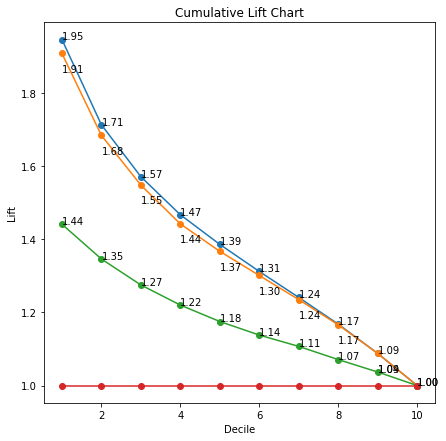

In [36]:
fig = plt.figure(figsize = [7,7])
ax1 = fig.add_subplot(1,1,1)
ax1.plot(combined_score_lift.index,combined_score_lift["cum_lift"], label = 'combined_score', marker='o')
for i, txt in enumerate(combined_score_lift["cum_lift"]):
    plt.annotate("{:.2f}".format(txt), (combined_score_lift.index[i], combined_score_lift["cum_lift"][i+1]))

ax1.plot(combined_score_lift.index,risk_score_lift["cum_lift"], label = 'risk_score', marker='o')
for i, txt in enumerate(risk_score_lift["cum_lift"]):
    plt.annotate("{:.2f}".format(txt), (risk_score_lift.index[i], risk_score_lift["cum_lift"][i+1]-0.05))

ax1.plot(combined_score_lift.index,final_score_lift["cum_lift"], label = 'knn_score', marker='o')
for i, txt in enumerate(final_score_lift["cum_lift"]):
    plt.annotate("{:.2f}".format(txt), (risk_score_lift.index[i], final_score_lift["cum_lift"][i+1]))

ax1.plot(np.arange(1,11,1),[1,1,1,1,1,1,1,1,1,1], label = 'random', marker='o')

plt.xlabel("Decile")
plt.ylabel("Lift")

ax1.set_title("Cumulative Lift Chart")
plt.show()    


## Gains Chart

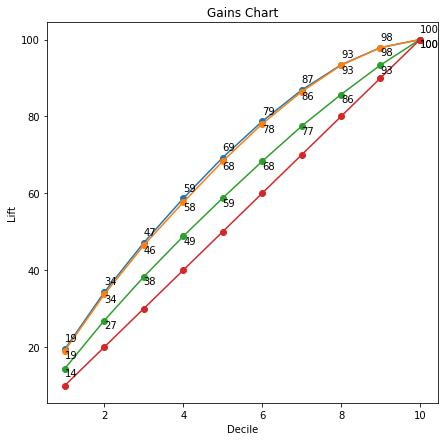

In [37]:
fig = plt.figure(figsize = [7,7])
ax1 = fig.add_subplot(1,1,1)
ax1.plot(combined_score_lift.index,[float(x.replace("%","")) for x in combined_score_lift["cum%_bads"]], label = 'combined_score', marker='o')
for i, txt in enumerate([float(x.replace("%","")) for x in combined_score_lift["cum%_bads"]]):
    plt.annotate("{:.0f}".format(txt), (combined_score_lift.index[i], [float(x.replace("%","")) for x in combined_score_lift["cum%_bads"]][i]+2))

ax1.plot(combined_score_lift.index,[float(x.replace("%","")) for x in risk_score_lift["cum%_bads"]], label = 'risk_score', marker='o')
for i, txt in enumerate([float(x.replace("%","")) for x in risk_score_lift["cum%_bads"]]):
    plt.annotate("{:.0f}".format(txt), (risk_score_lift.index[i], [float(x.replace("%","")) for x in risk_score_lift["cum%_bads"]][i]-2))

ax1.plot(combined_score_lift.index,[float(x.replace("%","")) for x in final_score_lift["cum%_bads"]], label = 'knn_score', marker='o')
for i, txt in enumerate([float(x.replace("%","")) for x in final_score_lift["cum%_bads"]]):
    plt.annotate("{:.0f}".format(txt), (risk_score_lift.index[i], [float(x.replace("%","")) for x in final_score_lift["cum%_bads"]][i]-2))

ax1.plot(np.arange(1,11,1),np.arange(10,101,10), label = 'random', marker='o')

plt.xlabel("Decile")
plt.ylabel("Lift")

ax1.set_title("Gains Chart")
plt.show()    


# Kolomogorov Smirnov chart

In [38]:
def ks(data=None,target=None, prob=None):
    data['target0'] = 1 - data[target]
    data['bucket'] = pd.qcut(data[prob], 10)
    grouped = data.groupby('bucket', as_index = False)
    kstable = pd.DataFrame()
    kstable['min_prob'] = grouped.min()[prob]
    kstable['max_prob'] = grouped.max()[prob]
    kstable['bads']   = grouped.sum()[target]
    kstable['goods'] = grouped.sum()['target0']
    kstable = kstable.sort_values(by="min_prob", ascending=False).reset_index(drop = True)
    kstable['%bads'] = (kstable.bads / data[target].sum()).apply('{0:.2%}'.format)
    kstable['%goods'] = (kstable.goods / data['target0'].sum()).apply('{0:.2%}'.format)
    kstable['cum%_bads']=(kstable.bads / data[target].sum()).cumsum()
    kstable['cum%_goods']=(kstable.goods / data['target0'].sum()).cumsum()
    kstable['KS'] = np.round(kstable['cum%_bads']-kstable['cum%_goods'], 3) * 100

    #Formating
    kstable['cum%_bads']= kstable['cum%_bads'].apply('{0:.2%}'.format)
    kstable['cum%_goods']= kstable['cum%_goods'].apply('{0:.2%}'.format)
    kstable.index = range(1,11)
    kstable.index.rename('Decile', inplace=True)
    pd.set_option('display.max_columns', 9)
    #print(kstable)
    
    #Display KS
    print("KS is " + str(max(kstable['KS']))+"%"+ " at decile " + str((kstable.index[kstable['KS']==max(kstable['KS'])][0])))
    return(kstable)

KS is 20.7% at decile 5


,min_prob,max_prob,bads,goods,%bads,%goods,cum%_bads,cum%_goods,KS
Decile,,,,,,,,,
1,0.122612,0.793451,25425.0,163827.0,19.46%,9.30%,19.46%,9.30%,10.2
2,0.100316,0.122612,19326.0,169925.0,14.79%,9.64%,34.26%,18.94%,15.3
3,0.087309,0.100316,16819.0,172432.0,12.88%,9.79%,47.13%,28.73%,18.4
4,0.077217,0.087309,15077.0,174174.0,11.54%,9.89%,58.67%,38.62%,20.1
5,0.068243,0.077217,13890.0,175361.0,10.63%,9.95%,69.31%,48.57%,20.7
6,0.059315,0.068243,12280.0,176972.0,9.40%,10.04%,78.71%,58.61%,20.1
7,0.049216,0.059314,10651.0,178600.0,8.15%,10.14%,86.86%,68.75%,18.1
8,0.035997,0.049216,8574.0,180677.0,6.56%,10.25%,93.42%,79.00%,14.4
9,0.021600,0.035997,5867.0,183384.0,4.49%,10.41%,97.92%,89.41%,8.5


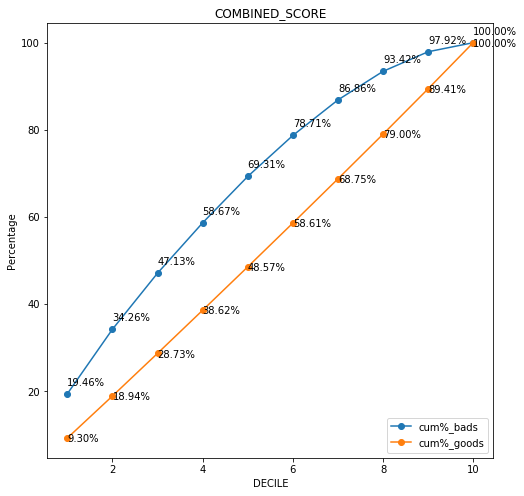

In [39]:
ks_df=ks(data=df,target=TARGET, prob=COMBINED_SCORE)

fig = plt.figure(figsize = [8,8])
ax1 = fig.add_subplot(1,1,1)
ax1.plot(ks_df.index,[float(x.replace("%","")) for x in ks_df["cum%_bads"]], label = "cum%_bads", marker='o')
for i, txt in enumerate(ks_df["cum%_bads"]):
    plt.annotate(txt, (ks_df.index[i], [float(x.replace("%","")) for x in ks_df["cum%_bads"]][i]+1.9))
ax1.plot(ks_df.index,[float(x.replace("%","")) for x in ks_df["cum%_goods"]], label = "cum%_goods", marker='o')
for i, txt in enumerate(ks_df["cum%_goods"]):
    plt.annotate(txt, (ks_df.index[i], [float(x.replace("%","")) for x in ks_df["cum%_goods"]][i]-0.9))
plt.xlabel("DECILE")
plt.ylabel("Percentage")
plt.legend(loc = 'lower right')
ax1.set_title("COMBINED_SCORE")
    
ks_df

KS is 19.7% at decile 5


,min_prob,max_prob,bads,goods,%bads,%goods,cum%_bads,cum%_goods,KS
Decile,,,,,,,,,
1,0.118737,0.755047,24930.0,164321.0,19.08%,9.33%,19.08%,9.33%,9.8
2,0.098609,0.118737,19063.0,170189.0,14.59%,9.66%,33.68%,18.99%,14.7
3,0.087105,0.098608,16670.0,172581.0,12.76%,9.80%,46.44%,28.78%,17.7
4,0.078168,0.087105,14660.0,174591.0,11.22%,9.91%,57.66%,38.69%,19.0
5,0.069530,0.078168,13949.0,175302.0,10.68%,9.95%,68.34%,48.64%,19.7
6,0.060847,0.069530,12677.0,176517.0,9.70%,10.02%,78.04%,58.66%,19.4
7,0.050678,0.060847,10943.0,178366.0,8.38%,10.12%,86.42%,68.78%,17.6
8,0.036696,0.050678,9001.0,180250.0,6.89%,10.23%,93.31%,79.01%,14.3
9,0.022119,0.036696,6001.0,183250.0,4.59%,10.40%,97.90%,89.41%,8.5


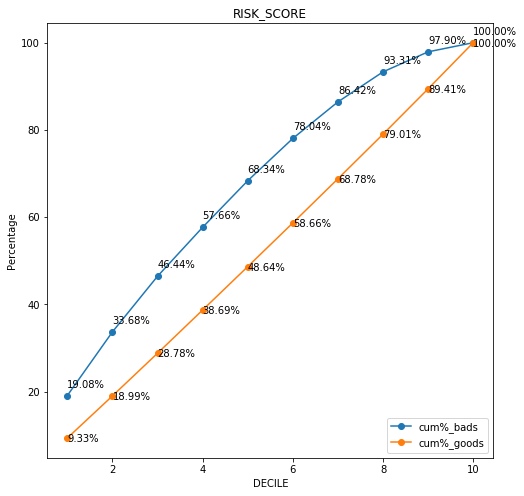

In [40]:
ks_df=ks(data=df,target=TARGET, prob=RISK_SCORE)

fig = plt.figure(figsize = [8,8])
ax1 = fig.add_subplot(1,1,1)
ax1.plot(ks_df.index,[float(x.replace("%","")) for x in ks_df["cum%_bads"]], label = "cum%_bads",marker='o')
for i, txt in enumerate(ks_df["cum%_bads"]):
    plt.annotate(txt, (ks_df.index[i], [float(x.replace("%","")) for x in ks_df["cum%_bads"]][i]+1.9))
ax1.plot(ks_df.index,[float(x.replace("%","")) for x in ks_df["cum%_goods"]], label = "cum%_goods", marker='o')
for i, txt in enumerate(ks_df["cum%_goods"]):
    plt.annotate(txt, (ks_df.index[i], [float(x.replace("%","")) for x in ks_df["cum%_goods"]][i]-0.9))
plt.xlabel("DECILE")
plt.ylabel("Percentage")
plt.legend(loc = 'lower right')
ax1.set_title("RISK_SCORE")
    
ks_df

KS is 9.5% at decile 4


,min_prob,max_prob,bads,goods,%bads,%goods,cum%_bads,cum%_goods,KS
Decile,,,,,,,,,
1,0.093175,0.213093,18827.0,170417.0,14.41%,9.67%,14.41%,9.67%,4.7
2,0.085480,0.093174,16331.0,172927.0,12.50%,9.81%,26.91%,19.49%,7.4
3,0.078462,0.085480,14817.0,174350.0,11.34%,9.90%,38.26%,29.38%,8.9
4,0.072258,0.078462,13780.0,175541.0,10.55%,9.96%,48.81%,39.35%,9.5
5,0.066300,0.072258,13007.0,176247.0,9.96%,10.00%,58.76%,49.35%,9.4
6,0.059970,0.066299,12460.0,176800.0,9.54%,10.03%,68.30%,59.38%,8.9
7,0.055178,0.059970,11969.0,177285.0,9.16%,10.06%,77.46%,69.45%,8.0
8,0.050525,0.055178,10775.0,178477.0,8.25%,10.13%,85.71%,79.58%,6.1
9,0.045311,0.050525,9999.0,179244.0,7.65%,10.17%,93.37%,89.75%,3.6


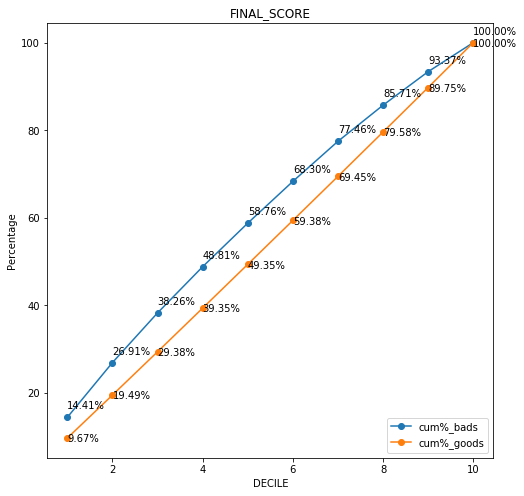

In [41]:
ks_df=ks(data=df,target=TARGET, prob=FINAL_SCORE)

fig = plt.figure(figsize = [8,8])
ax1 = fig.add_subplot(1,1,1)
ax1.plot(ks_df.index,[float(x.replace("%","")) for x in ks_df["cum%_bads"]], label = "cum%_bads", marker='o')
for i, txt in enumerate(ks_df["cum%_bads"]):
    plt.annotate(txt, (ks_df.index[i], [float(x.replace("%","")) for x in ks_df["cum%_bads"]][i]+1.9))
ax1.plot(ks_df.index,[float(x.replace("%","")) for x in ks_df["cum%_goods"]], label = "cum%_goods", marker='o')
for i, txt in enumerate(ks_df["cum%_goods"]):
    plt.annotate(txt, (ks_df.index[i], [float(x.replace("%","")) for x in ks_df["cum%_goods"]][i]-0.9))
plt.xlabel("DECILE")
plt.ylabel("Percentage")
plt.legend(loc = 'lower right')
ax1.set_title("FINAL_SCORE")

ks_df

# Log Loss

# Concordant – Discordant ratio

# Precision Recall Curve

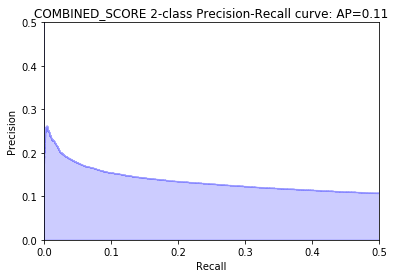

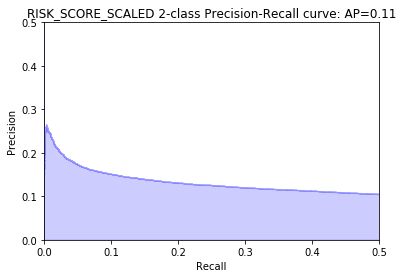

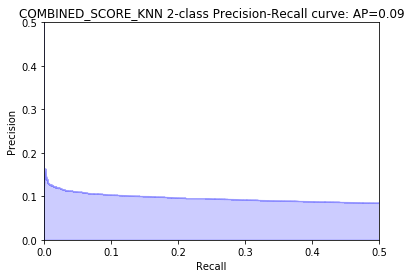

In [42]:
from sklearn.metrics import precision_recall_curve, average_precision_score

for x in [COMBINED_SCORE,RISK_SCORE,FINAL_SCORE]:
    precision, recall, _ = precision_recall_curve(df[TARGET],df[x])

    step_kwargs = ({'step': 'post'}
                   #if 'step' in signature(plt.fill_between).parameters
                   #else {}
                  )
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 0.5])
    plt.xlim([0.0, 0.5])
    plt.title(x+' 2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision_score(df[TARGET],df[x])))
    plt.show()
    # calculate precision-recall AUC
    auc_pr = auc(recall, precision)
    #print(x +" AUC for precision-recall :",auc_pr)
    print("\n")
